<a id='index'> </a>


---

## Table of Contents


1. **[Defining Problem Statement](#1)**
    - 1.1 **[Problem Statement](#1.1)**
    - 1.2 **[Importing Libraries](#1.2)**
    - 1.3 **[Importing Data](#1.3)**
    - 1.4 **[Validation Split](#1.4)**
    - 1.5 **[Exploring Various Data Import Methods](#1.5)**
2. **[Visualizations](#2)**
    - **[2.1 Distributions of classes](#2.1)**
    - **[2.2 Plotting Sample Images](#2.2)**
3. **[Building Architechture](#3)**
    - **[3.1 Building Basic ANN Architechture](#3.1)**
        - **[3.11 Model Summary](#3.11)**
        - **[3.12 Taking best model weights for test accuracy](#3.12)**
        - **[3.13 Plotting Confusion Matrix](#3.13)**
        - **[3.14 Plotting accuracy & loss wrt epochs](#3.14)**
    
    - **[3.2 Building CNN Architechture](#3.2)**
        - **[3.21 Model Summary](#3.21)**
        - **[3.22 Test accuracy using last training epoch](#3.22)**
        - **[3.23 Taking best model weights for test accuracy](#3.23)**
        - **[3.24 Plotting Confusion Matrix](#3.24)**
        - **[3.25 Plotting accuracy & loss wrt epochs](#3.25)**
        - **[3.26 Saving model](#3.26)**
    - **[3.3 Model Training after data augmentation](#3.3)**
        - **[3.31 Model Summary](#3.31)**
        - **[3.32 Taking best model weights for test accuracy](#3.32)**
        - **[3.33 Plotting Confusion Matrix](#3.33)**
        - **[3.34 Plotting accuracy & loss wrt epochs](#3.34)**
    - **[3.4 Tranfer Learning with ResNet152V2](#3.4)**
        - **[3.41 Model Summary](#3.41)**
        - **[3.42 Taking best model weights for test accuracy](#3.42)**
        - **[3.43 Plotting Confusion Matrix](#3.43)**
        - **[3.44 Plotting accuracy & loss wrt epochs](#3.44)**
        
4.  **[  Summary & Insights](#4)**


---

<a id='1'> </a>

# 1. Defining Problem Statement


<a id='1'> </a>

## 1.1 Problem Statement



```Ninjacart is India's largest fresh produce supply chain company. They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology. They source fresh produce from farmers and deliver them to businesses within 12 hours. An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.```

```As a starting point, ninjacart has provided us with a dataset scraped from the web which contains train and test folders, each having 4 sub-folders with images of onions, potatoes, tomatoes and some market scenes. We have been tasked with preparing a multiclass classifier for identifying these vegetables. The dataset provided has all the required images to achieve the task.```

<a id='1.2'> </a>

## 1.2 Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, regularizers

plt.rcParams.update({'font.size': 14})

**[Return to the index](#index)**

<a id='1.3'> </a>

## 1.3 Importing Data 

In [302]:
%%time

traindatagen = ImageDataGenerator(rescale=1.0/225)
train_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train"

train_data = traindatagen.flow_from_directory(directory=train_dir,shuffle=True,seed=123,batch_size=32,target_size=(128, 128))

Found 4133 images belonging to 4 classes.
CPU times: total: 422 ms
Wall time: 408 ms


In [52]:
%%time

testdatagen = ImageDataGenerator(rescale=1.0/225)
test_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\test"

test_data = testdatagen.flow_from_directory(directory=test_dir,shuffle=True,seed=123,batch_size=32,target_size=(128, 128))

Found 351 images belonging to 4 classes.
CPU times: total: 93.8 ms
Wall time: 72 ms


In [300]:
train_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train"
data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)



train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)

Found 4133 images belonging to 4 classes.


In [84]:
test_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\test"
data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)



test_data1 = data_gen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)

Found 351 images belonging to 4 classes.


**[Return to the index](#index)**

<a id='1.4'> </a>

## 1.4 Validation Split

In [252]:
import splitfolders
input_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train"
output_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\delet"
splitfolders.ratio(input_dir,output=output_dir,ratio=(.9,.1))

Copying files: 4133 files [00:35, 117.89 files/s]


In [299]:
%%time

#Importing Validation Data

valdatagen = ImageDataGenerator(rescale=1.0/225)
val_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\val"

val_data = valdatagen.flow_from_directory(directory=val_dir,shuffle=True,seed=123,batch_size=32,target_size=(128, 128))

Found 314 images belonging to 4 classes.
CPU times: total: 46.9 ms
Wall time: 50 ms


<a id='1.5'> </a>

## 1.5 Exploring Various Data Import Methods

In [297]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train", shuffle = True,
)


print('\nLoading val Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\val", shuffle = True,
)


print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\test", shuffle = True,
)





height, width = 128, 128

data_preprocess = keras.Sequential(
                    
                    name="data_preprocess",
                    layers=[
                              layers.Resizing(height, width), # Shape Preprocessing
                              layers.Rescaling(1.0/255), # Value Preprocessing
                            ]
)




# Perform Data Processing on the train, val, test dataset
train_data = train_data.map(lambda x, y: (data_preprocess(x), y))
test_data = test_data.map(lambda x, y: (data_preprocess(x), y))
val_data = val_data.map(lambda x, y: (data_preprocess(x), y))
     


Loading Train Data...
Found 4133 files belonging to 4 classes.

Loading val Data...
Found 314 files belonging to 4 classes.

Loading Test Data...
Found 351 files belonging to 4 classes.


In [295]:
img_size = (128,128)
train_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train"

data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)
train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)



test_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\test"


data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)



test_data = data_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)



val_dir = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\val"

data_gen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values

)



val_data = data_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    class_mode='categorical',
    shuffle=False  # don't shuffle the data
)

Found 4133 images belonging to 4 classes.
Found 351 images belonging to 4 classes.
Found 314 images belonging to 4 classes.


**[Return to the index](#index)**

---
<a id='2'> </a>

# 2. Visualizations

<a id='2.1'> </a>

## 2.1 Distributions of classes

                        {'indian market': 0, 'onion': 1, 'potato': 2, 'tomato': 3} 



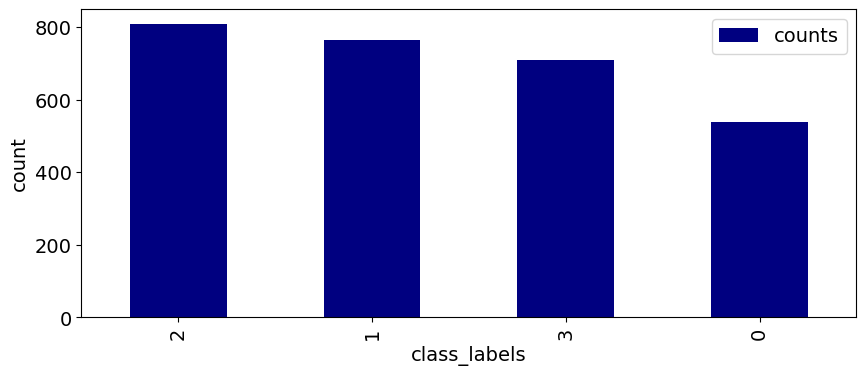

In [54]:
print('                       ',
      train_data.class_indices,'\n')



pd.Series(train_data.classes.tolist()).value_counts(
    ).reset_index().set_index('index').rename(columns={
        0: 'counts'
    }).plot(kind='bar', color='navy', figsize=(10, 4))
plt.xlabel('class_labels')
plt.ylabel('count');

                        {'indian market': 0, 'onion': 1, 'potato': 2, 'tomato': 3} 



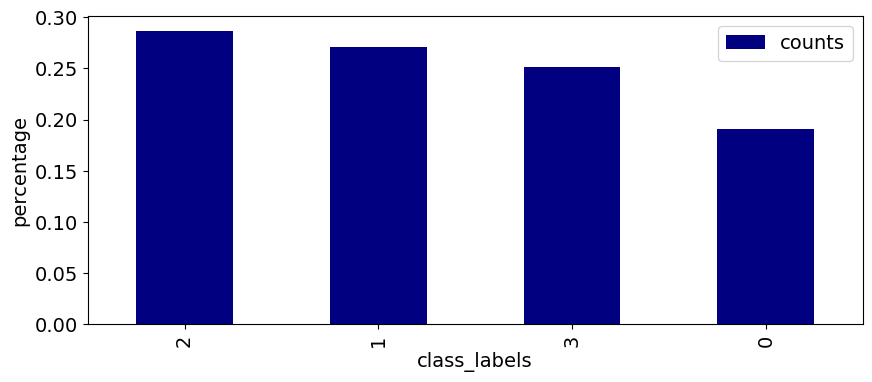

In [55]:
print('                       ',
      train_data.class_indices,'\n')



pd.Series(train_data.classes.tolist()).value_counts(
    normalize=True).reset_index().set_index('index').rename(columns={
        0: 'counts'
    }).plot(kind='bar', color='navy', figsize=(10, 4))
plt.xlabel('class_labels')
plt.ylabel('percentage');

                        {'indian market': 0, 'onion': 1, 'potato': 2, 'tomato': 3} 



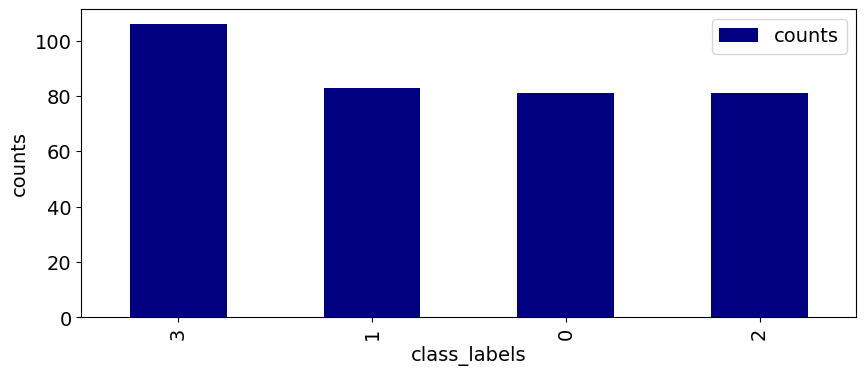

In [259]:
print('                       ',
      test_data.class_indices,'\n')




pd.Series(test_data.classes.tolist()).value_counts(
    ).reset_index().set_index('index').rename(columns={
        0: 'counts'
    }).plot(kind='bar', color='navy', figsize=(10, 4))
plt.xlabel('class_labels')
plt.ylabel('counts');

                        {'indian market': 0, 'onion': 1, 'potato': 2, 'tomato': 3} 



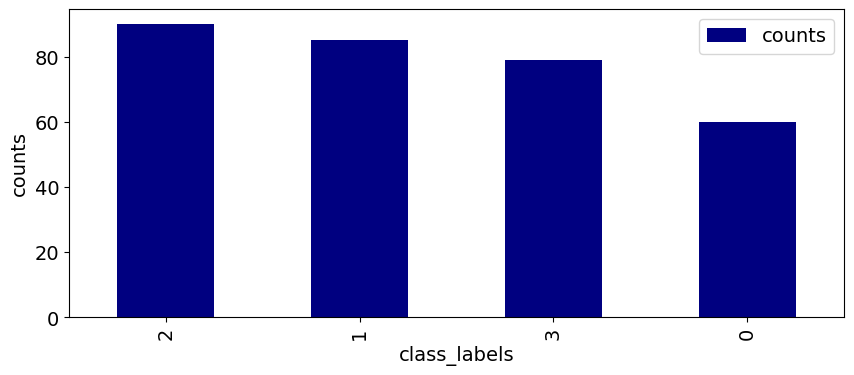

In [258]:
print('                       ',
      val_data.class_indices,'\n')




pd.Series(val_data.classes.tolist()).value_counts(
    ).reset_index().set_index('index').rename(columns={
        0: 'counts'
    }).plot(kind='bar', color='navy', figsize=(10, 4))
plt.xlabel('class_labels')
plt.ylabel('counts');

**[Return to the index](#index)**

<a id='2.2'> </a>

## 2.2 Plotting Sample Images

In [32]:
X_train,y_train = next(train_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

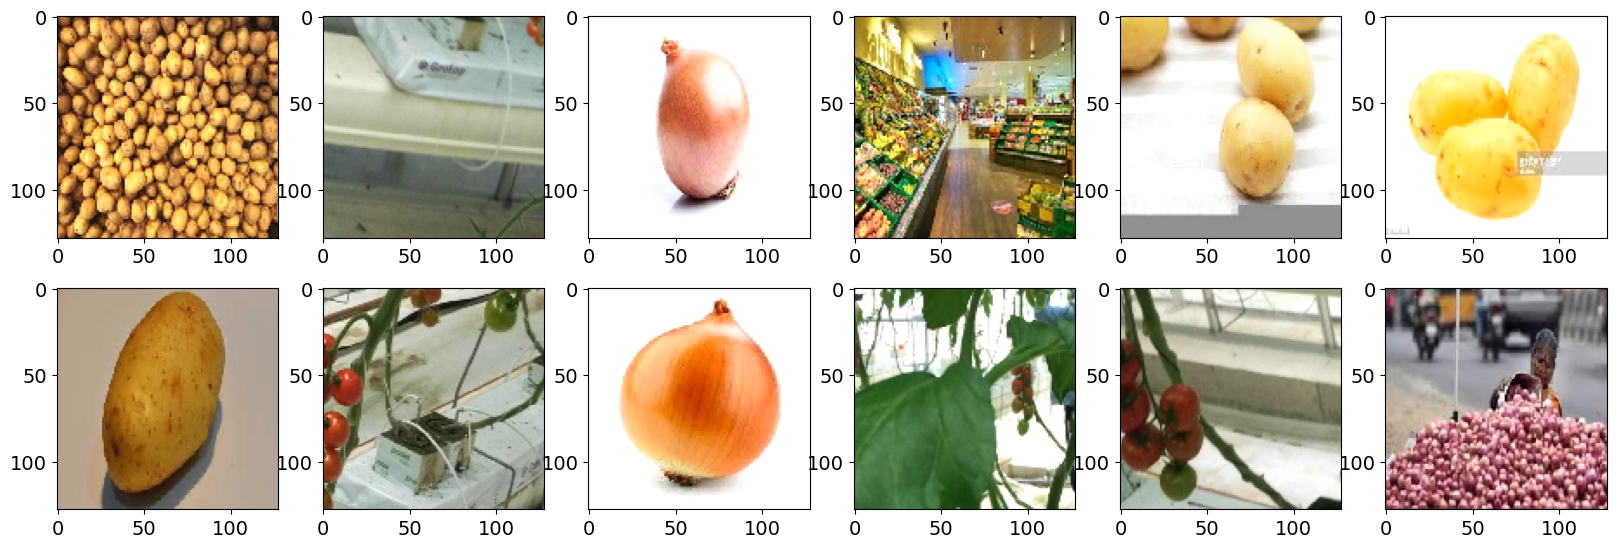

In [33]:
X_train,y_train = next(train_data)

plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3,6,i+1)
    plt.imshow(X_train[i])


**[Return to the index](#index)**

---
<a id='3'> </a>

# 3. Building Architechture

<a id='3.1'> </a>

## 3.1 Building Basic ANN Architechture

In [ ]:
num_classes = 4
hidden_size_1 = 256
hidden_size_2 = 256


model_ann = keras.Sequential(
    name="model_ANN",
    layers=[
        
        

        layers.Flatten(input_shape=(height, width, 3)),
        
        layers.Dense(units=hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units=hidden_size_2, activation='relu'), # hidden layer 2
        

        layers.Dense(units=num_classes, activation='softmax'), # output layer
    ]
)

<a id='3.11'> </a>

### 3.11 Model Summary

In [253]:
model_ann.summary()

Model: "model_ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 49152)             0         
                                                                 
 dense_68 (Dense)            (None, 256)               12583168  
                                                                 
 dense_69 (Dense)            (None, 256)               65792     
                                                                 
 dense_70 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 12,649,988
Trainable params: 12,649,988
Non-trainable params: 0
_________________________________________________________________


In [266]:
model_ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



epochs = 20

model_checkpoint = ModelCheckpoint('model_ann.h5', save_best_only=True)

model_fit_ann = model_ann.fit(train_data, validation_data=val_data, epochs=epochs,
callbacks=[model_checkpoint],workers=-1)

Epoch 1/20
130/130 [==============================] - 35s 261ms/step - loss: 5.3977 - accuracy: 0.4452 - val_loss: 1.0812 - val_accuracy: 0.5605
Epoch 2/20
130/130 [==============================] - 36s 278ms/step - loss: 1.0943 - accuracy: 0.6136 - val_loss: 0.7948 - val_accuracy: 0.6720
Epoch 3/20
130/130 [==============================] - 37s 285ms/step - loss: 0.9504 - accuracy: 0.6271 - val_loss: 0.7257 - val_accuracy: 0.6975
Epoch 4/20
130/130 [==============================] - 33s 252ms/step - loss: 0.8637 - accuracy: 0.6649 - val_loss: 0.7656 - val_accuracy: 0.6624
Epoch 5/20
130/130 [==============================] - 34s 263ms/step - loss: 0.7853 - accuracy: 0.6966 - val_loss: 0.9635 - val_accuracy: 0.5764
Epoch 6/20
130/130 [==============================] - 34s 258ms/step - loss: 0.8003 - accuracy: 0.6857 - val_loss: 0.9394 - val_accuracy: 0.5987
Epoch 7/20
130/130 [==============================] - 34s 265ms/step - loss: 0.7715 - accuracy: 0.7014 - val_loss: 0.7690 - val_ac

<a id='3.12'> </a>

### 3.12 Taking best model weights for test accuracy

In [267]:
model_ann.load_weights('model_ann.h5')

In [270]:
y_pred_ann = np.argmax(model_ann.predict(test_data1),axis=1)

11/11 [==============================] - 3s 222ms/step


In [273]:
test_loss_ann,test_accuracy_ann = model_ann.evaluate(test_data1)

11/11 [==============================] - 2s 206ms/step - loss: 0.8980 - accuracy: 0.6296


**[Return to the index](#index)**

<a id='3.13'> </a>

### 3.13 Plotting Confusion Matrix

Confusion matrix:
[[24 20 35  2]
 [ 3 41 36  3]
 [ 5 11 65  0]
 [ 8  3  4 91]]
Classification report:
               precision    recall  f1-score   support

indian market       0.98      0.69      0.81        81
        onion       0.65      0.84      0.74        83
       potato       0.81      0.80      0.81        81
       tomato       0.98      0.99      0.99       106

     accuracy                           0.84       351
    macro avg       0.86      0.83      0.84       351
 weighted avg       0.87      0.84      0.85       351







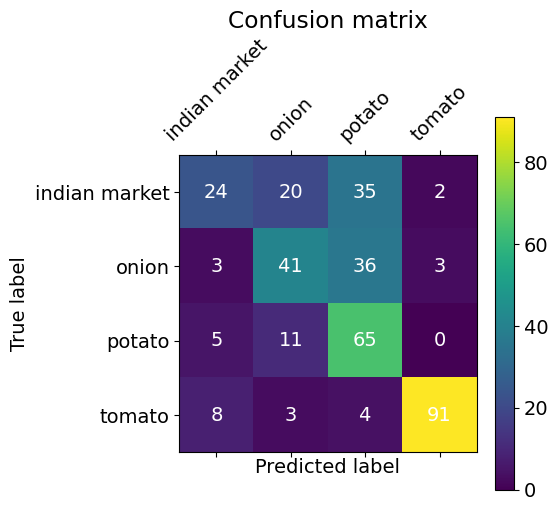

In [272]:


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred_ann)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(test_data1.class_indices.keys())
report = classification_report(y_true, y_pred_rn, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

<a id='3.14'> </a>

### 3.14 Plotting accuracy & loss wrt epochs

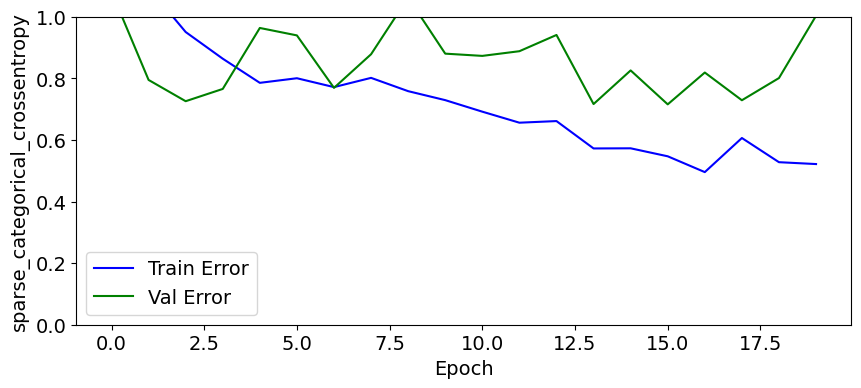

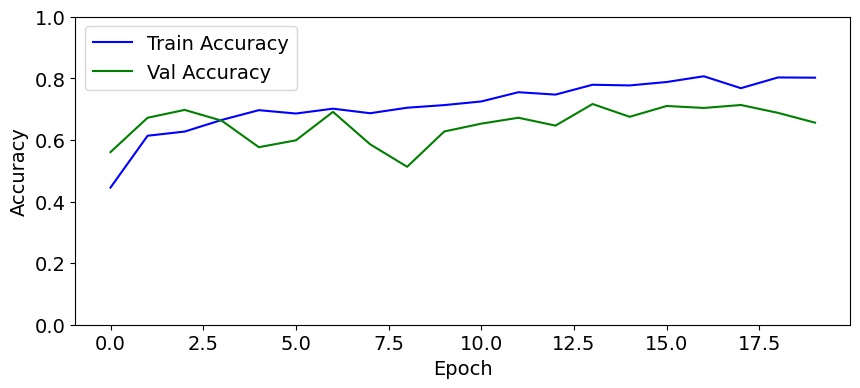

In [274]:
hist_ann = pd.DataFrame(model_fit_ann.history)
hist_ann['epoch'] = model_fit_ann.epoch
hist_ann.head(3)



def plot_history(history):

    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('sparse_categorical_crossentropy')
    plt.plot(hist_ann['epoch'], hist_ann['loss'],
             label='Train Error',color='b')
    plt.plot(hist_ann['epoch'], hist_ann['val_loss'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([0,1])
    
    
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist_ann['epoch'], hist_ann['accuracy'],
             label='Train Accuracy',color='b')
    plt.plot(hist_ann['epoch'], hist_ann['val_accuracy'],
         label='Val Accuracy',color='g')
    plt.legend()
    plt.ylim([0,1])
plot_history(model_fit_ann)

**[Return to the index](#index)**

----

<a id='3.2'> </a>

## 3.2 Building CNN Architechture

In [106]:
height, width = 128, 128


hidden_size1 = 128
hidden_size2 = 256
num_classes = 4

model = keras.Sequential(
    name = 'cnn_1',
    
    layers = [
        layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', input_shape = (height,width,3)),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.GlobalAvgPool2D(),
        
        layers.Dense(units=hidden_size1),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(.3),
        
        layers.Dense(units=hidden_size2),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(.2),
        
        layers.Dense(units=hidden_size1),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(.1),
        layers.Dense(units = num_classes, activation = 'softmax')
             
])


**[Return to the index](#index)**

<a id='3.21'> </a>

### 3.21 Model Summary

In [107]:
model.summary()

Model: "cnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 activation_56 (Activation)  (None, 128, 128, 16)      0         
                                                                 
 batch_normalization_56 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 activation_57 (Activation)  (None, 64, 64, 32)        0     

In [133]:
%%time

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




epochs = 50

model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

model_fit = model.fit(train_data, validation_data=val_data, epochs=epochs,
callbacks=[model_checkpoint],workers=-1)


# model_fit = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
89/89 [==============================] - 88s 950ms/step - loss: 0.0305 - accuracy: 0.9890 - val_loss: 0.6496 - val_accuracy: 0.8949
Epoch 2/50
89/89 [==============================] - 84s 928ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.3589 - val_accuracy: 0.9172
Epoch 3/50
89/89 [==============================] - 83s 921ms/step - loss: 0.0333 - accuracy: 0.9883 - val_loss: 0.3982 - val_accuracy: 0.8758
Epoch 4/50
89/89 [==============================] - 83s 922ms/step - loss: 0.0216 - accuracy: 0.9918 - val_loss: 0.3578 - val_accuracy: 0.9076
Epoch 5/50
89/89 [==============================] - 82s 911ms/step - loss: 0.0209 - accuracy: 0.9922 - val_loss: 0.4011 - val_accuracy: 0.9204
Epoch 6/50
89/89 [==============================] - 83s 925ms/step - loss: 0.0592 - accuracy: 0.9809 - val_loss: 0.6544 - val_accuracy: 0.8758
Epoch 7/50
89/89 [==============================] - 82s 908ms/step - loss: 0.0820 - accuracy: 0.9780 - val_loss: 0.5496 - val_accuracy: 0.8949

**[Return to the index](#index)**

<a id='3.22'> </a>

### 3.22 Test accuracy using last training epoch

In [136]:
y_pred = np.argmax(model.predict(test_data1),axis=1)

11/11 [==============================] - 4s 309ms/step


In [135]:
test_loss,test_accuracy = model.evaluate(test_data)

11/11 [==============================] - 3s 229ms/step - loss: 0.5705 - accuracy: 0.8604


In [137]:
test_accuracy

0.8603988885879517

<a id='3.23'> </a>

### 3.23 Taking best model weights for test accuracy

In [156]:
model.load_weights('model.h5')

In [157]:

y_pred1 = np.argmax(model.predict(test_data1),axis=1)

11/11 [==============================] - 3s 287ms/step


In [158]:
test_loss1,test_accuracy1 = model.evaluate(test_data)

11/11 [==============================] - 3s 202ms/step - loss: 0.3933 - accuracy: 0.9117


In [154]:
# model1 = model.load_weights('model.h5')

In [160]:
test_accuracy1

0.9116809368133545

**[Return to the index](#index)**

<a id='3.24'> </a>

### 3.24 Plotting Confusion Matrix

Confusion matrix:
[[ 74   7   0   0]
 [  3  76   4   0]
 [  3  20  58   0]
 [  0   0   1 105]]
Classification report:
               precision    recall  f1-score   support

indian market       0.93      0.91      0.92        81
        onion       0.74      0.92      0.82        83
       potato       0.92      0.72      0.81        81
       tomato       1.00      0.99      1.00       106

     accuracy                           0.89       351
    macro avg       0.90      0.88      0.88       351
 weighted avg       0.90      0.89      0.89       351







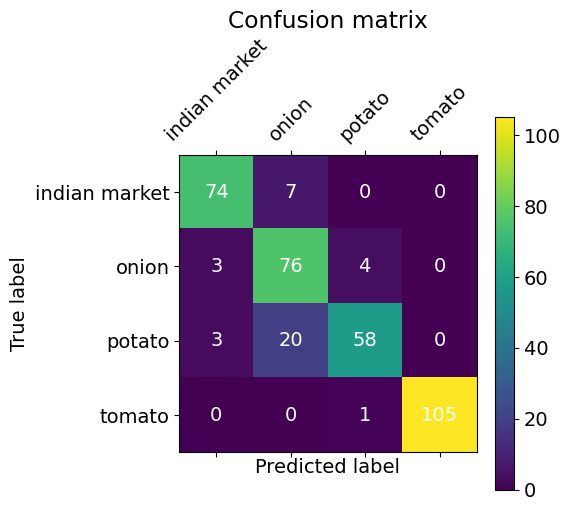

In [169]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred1)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(test_data1.class_indices.keys())
report = classification_report(y_true, y_pred1, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

In [175]:
hist = pd.DataFrame(model_fit.history)
hist['epoch'] = model_fit.epoch
hist.head(3)

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.030531,0.989011,0.649625,0.894904,0
1,0.022419,0.992556,0.358858,0.917197,1
2,0.033335,0.988302,0.398157,0.875796,2


**[Return to the index](#index)**

<a id='3.25'> </a>

### 3.25 Plotting accuracy & loss wrt epochs

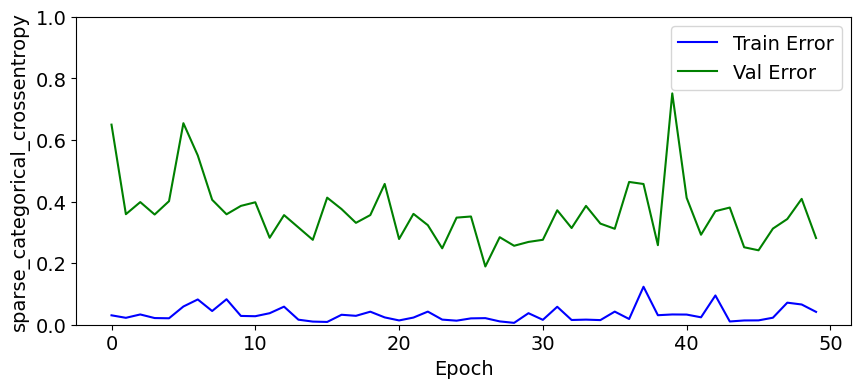

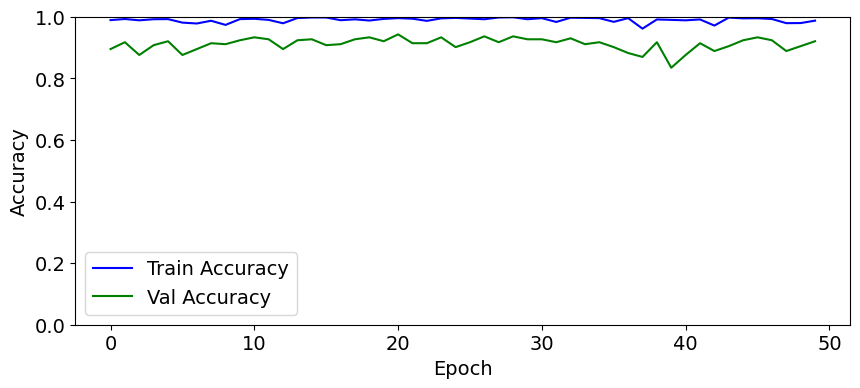

In [177]:
def plot_history(history):

    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('sparse_categorical_crossentropy')
    plt.plot(hist['epoch'], hist['loss'],
             label='Train Error',color='b')
    plt.plot(hist['epoch'], hist['val_loss'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([0,1])
    
    
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
             label='Train Accuracy',color='b')
    plt.plot(hist['epoch'], hist['val_accuracy'],
         label='Val Accuracy',color='g')
    plt.legend()
    plt.ylim([0,1])
plot_history(model_fit)

<a id='3.26'> </a>

### 3.26 Saving model

In [185]:
model.save('my_model.h5')

<a id='3.3'> </a>

## 3.3 Model Training after data augmentation

In [181]:
datagen1 = ImageDataGenerator(rotation_range=45,width_shift_range=0.2,height_shift_range=0.2
                              ,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='reflect')



i = 0
dir_ = "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train"
for batch in datagen1.flow_from_directory(directory=dir_,batch_size=16,target_size=(128,128)
                                          ,color_mode='rgb',save_to_dir=dir_,save_prefix='aug',save_format='png'):
    i+=1
    if i > 80:  
        break

Found 2821 images belonging to 4 classes.


In [292]:
print('\nLoading Train Data...')
train_data1 = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\train", shuffle = True,
)


print('\nLoading val Data...')
val_data1 = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\val", shuffle = True,
)


# print('\nLoading Test Data...')
# test_data = tf.keras.utils.image_dataset_from_directory(
#     "C:\\Users\\user\\Desktop\\Jabra2\\p\\ninjacart_data\\test", shuffle = True,
# )



height, width = 128, 128

data_preprocess = keras.Sequential(
                    
                    name="data_preprocess",
                    layers=[
                              layers.Resizing(height, width), # Shape Preprocessing
                              layers.Rescaling(1.0/255), # Value Preprocessing
                            ]
)

# Perform Data Processing on the train, val, test dataset
train_data1 = train_data1.map(lambda x, y: (data_preprocess(x), y))
# test_data = test_data.map(lambda x, y: (data_preprocess(x), y))
val_data1 = val_data1.map(lambda x, y: (data_preprocess(x), y))
     


Loading Train Data...
Found 4133 files belonging to 4 classes.

Loading val Data...
Found 314 files belonging to 4 classes.


In [281]:
height, width = 128, 128


hidden_size1 = 128
hidden_size2 = 256
num_classes = 4

model1 = keras.Sequential(
    name = 'cnn_1',
    
    layers = [
        layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', input_shape = (height,width,3)),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        
        layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same'),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.GlobalAvgPool2D(),
        
        layers.Dense(units=hidden_size1),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(.3),
        
        layers.Dense(units=hidden_size2),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(.2),
        
        layers.Dense(units=hidden_size1),
        layers.Activation('relu'),
        layers.BatchNormalization(),
        layers.Dropout(.1),
        layers.Dense(units = num_classes, activation = 'softmax')
             
])

**[Return to the index](#index)**

<a id='3.31'> </a>

### 3.31 Model Summary

In [192]:
model1.summary()

Model: "cnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 activation_80 (Activation)  (None, 128, 128, 16)      0         
                                                                 
 batch_normalization_80 (Bat  (None, 128, 128, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 activation_81 (Activation)  (None, 64, 64, 32)        0     

In [193]:
%%time

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




epochs = 50

model_checkpoint = ModelCheckpoint('model1.h5', save_best_only=True)

model_fit = model1.fit(train_data1, validation_data=val_data, epochs=epochs,
callbacks=[model_checkpoint],workers=-1)




Epoch 1/50
130/130 [==============================] - 109s 807ms/step - loss: 0.7875 - accuracy: 0.7029 - val_loss: 3.8638 - val_accuracy: 0.2516
Epoch 2/50
130/130 [==============================] - 104s 794ms/step - loss: 0.5642 - accuracy: 0.7837 - val_loss: 1.5036 - val_accuracy: 0.5287
Epoch 3/50
130/130 [==============================] - 102s 780ms/step - loss: 0.4737 - accuracy: 0.8164 - val_loss: 1.5806 - val_accuracy: 0.4682
Epoch 4/50
130/130 [==============================] - 103s 789ms/step - loss: 0.3957 - accuracy: 0.8500 - val_loss: 0.6294 - val_accuracy: 0.7739
Epoch 5/50
130/130 [==============================] - 105s 800ms/step - loss: 0.4049 - accuracy: 0.8444 - val_loss: 0.6548 - val_accuracy: 0.7134
Epoch 6/50
130/130 [==============================] - 103s 785ms/step - loss: 0.3807 - accuracy: 0.8500 - val_loss: 1.0646 - val_accuracy: 0.6433
Epoch 7/50
130/130 [==============================] - 104s 796ms/step - loss: 0.3832 - accuracy: 0.8531 - val_loss: 0.3684 -

**[Return to the index](#index)**

<a id='3.32'> </a>

### 3.32 Taking best model weights for test accuracy

In [194]:
model1.load_weights('model1.h5')

In [195]:
y_pred2 = np.argmax(model1.predict(test_data1),axis=1)

11/11 [==============================] - 4s 283ms/step


In [196]:
test_loss2,test_accuracy2 = model1.evaluate(test_data)

11/11 [==============================] - 3s 214ms/step - loss: 0.3498 - accuracy: 0.9003


<a id='3.33'> </a>

### 3.33 Plotting Confusion Matrix

Confusion matrix:
[[ 72   9   0   0]
 [  2  78   3   0]
 [  5  26  50   0]
 [  1   0   0 105]]
Classification report:
               precision    recall  f1-score   support

indian market       0.90      0.89      0.89        81
        onion       0.69      0.94      0.80        83
       potato       0.94      0.62      0.75        81
       tomato       1.00      0.99      1.00       106

     accuracy                           0.87       351
    macro avg       0.88      0.86      0.86       351
 weighted avg       0.89      0.87      0.87       351







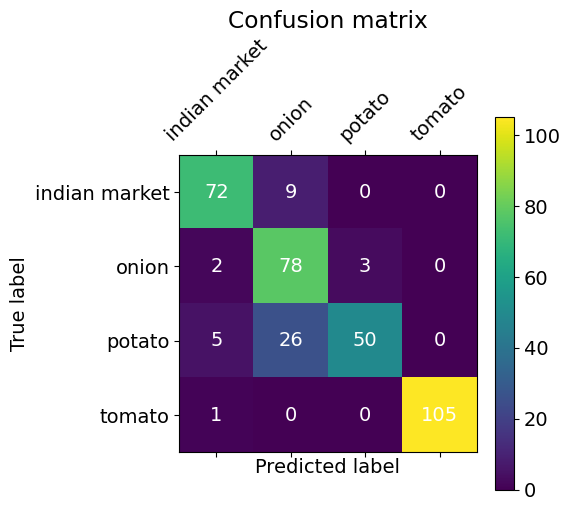

In [197]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred2)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(test_data1.class_indices.keys())
report = classification_report(y_true, y_pred2, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

**[Return to the index](#index)**

<a id='3.34'> </a>

### 3.34 Plotting accuracy & loss wrt epochs

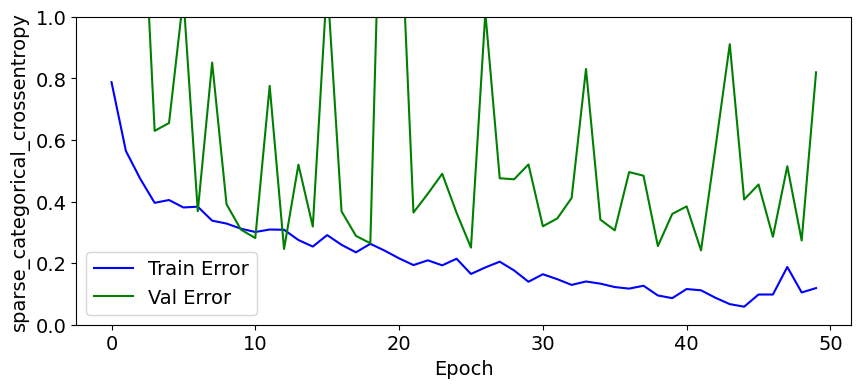

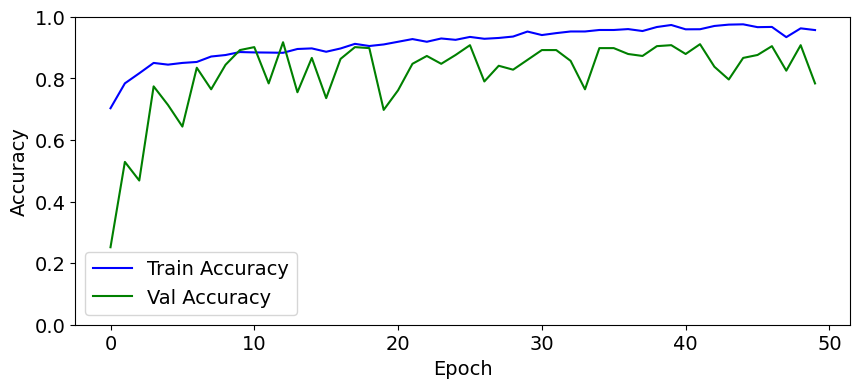

In [277]:
hist_1 = pd.DataFrame(model_fit.history)
hist_1['epoch'] = model_fit.epoch
hist_1.head(3)



def plot_history(history):

    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('sparse_categorical_crossentropy')
    plt.plot(hist_1['epoch'], hist_1['loss'],
             label='Train Error',color='b')
    plt.plot(hist_1['epoch'], hist_1['val_loss'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([0,1])
    
    
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist_1['epoch'], hist_1['accuracy'],
             label='Train Accuracy',color='b')
    plt.plot(hist_1['epoch'], hist_1['val_accuracy'],
         label='Val Accuracy',color='g')
    plt.legend()
    plt.ylim([0,1])
plot_history(model_fit)

**[Return to the index](#index)**

<a id='3.4'> </a>

## 3.4 Tranfer Learning with ResNet152V2

In [278]:
resnet_model = keras.Sequential()

pretrained_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape,
    pooling='max',
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(keras.layers.Flatten())
resnet_model.add(keras.layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
resnet_model.add(keras.layers.Dropout(0.3))
resnet_model.add(keras.layers.BatchNormalization())
resnet_model.add(keras.layers.Dense(4,activation='softmax'))

<a id='3.41'> </a>

### 3.41 Model Summary

In [279]:
resnet_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_71 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_88 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_72 (Dense)            (None, 4)                 2052      
                                                     

**[Return to the index](#index)**

In [314]:
resnet_model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




epochs = 20

model_checkpoint_rn = ModelCheckpoint('resnet_model.h5', save_best_only=True)

model_fit_rn = resnet_model.fit(train_data, validation_data=val_data, epochs=epochs,
callbacks=[model_checkpoint_rn],workers=-1)

Epoch 1/20
130/130 [==============================] - 752s 6s/step - loss: 6.4660 - accuracy: 0.8427 - val_loss: 5.7474 - val_accuracy: 0.8949
Epoch 2/20
130/130 [==============================] - 703s 5s/step - loss: 6.1527 - accuracy: 0.8393 - val_loss: 6.4114 - val_accuracy: 0.8917
Epoch 3/20
130/130 [==============================] - 646s 5s/step - loss: 6.0545 - accuracy: 0.8611 - val_loss: 6.1225 - val_accuracy: 0.8694
Epoch 4/20
130/130 [==============================] - 619s 5s/step - loss: 6.3698 - accuracy: 0.8568 - val_loss: 6.9499 - val_accuracy: 0.8312
Epoch 5/20
130/130 [==============================] - 657s 5s/step - loss: 6.3253 - accuracy: 0.8483 - val_loss: 6.6518 - val_accuracy: 0.7834
Epoch 6/20
130/130 [==============================] - 644s 5s/step - loss: 6.3356 - accuracy: 0.8418 - val_loss: 6.2961 - val_accuracy: 0.8854
Epoch 7/20
130/130 [==============================] - 633s 5s/step - loss: 6.5618 - accuracy: 0.8546 - val_loss: 6.6300 - val_accuracy: 0.7643

<a id='3.42'> </a>

### 3.42 Taking best model weights for test accuracy

In [315]:
resnet_model.load_weights('resnet_model.h5')

In [316]:
y_pred_rn = np.argmax(resnet_model.predict(test_data1),axis=1)

11/11 [==============================] - 67s 4s/step


In [317]:
test_loss_rn,test_accuracy_rn = resnet_model.evaluate(test_data1)

11/11 [==============================] - 53s 5s/step - loss: 5.9652 - accuracy: 0.7920


**[Return to the index](#index)**

<a id='3.43'> </a>

### 3.43 Plotting Confusion Matrix

Confusion matrix:
[[68 11  2  0]
 [ 0 47 36  0]
 [ 2 12 67  0]
 [ 1  9  0 96]]
Classification report:
               precision    recall  f1-score   support

indian market       0.96      0.84      0.89        81
        onion       0.59      0.57      0.58        83
       potato       0.64      0.83      0.72        81
       tomato       1.00      0.91      0.95       106

     accuracy                           0.79       351
    macro avg       0.80      0.78      0.79       351
 weighted avg       0.81      0.79      0.80       351







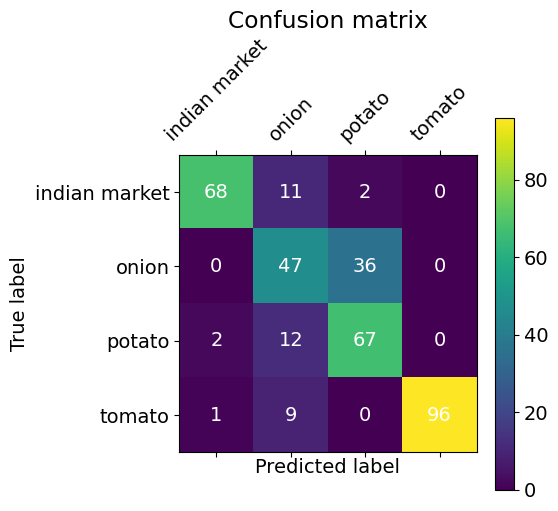

In [318]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report, confusion_matrix

cm = confusion_matrix(y_true, y_pred_rn)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = list(test_data1.class_indices.keys())
report = classification_report(y_true, y_pred_rn, target_names=class_names)
print('Classification report:')
print(report)

print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)


# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

**[Return to the index](#index)**

<a id='3.44'> </a>

### 3.44 Plotting accuracy & loss wrt epochs

In [320]:
hist_resnet.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,6.466049,0.842729,5.747428,0.894904,0
1,6.152742,0.839342,6.411397,0.891720,1
2,6.054477,0.861118,6.122522,0.869427,2
3,6.369775,0.856763,6.949936,0.831210,3
4,6.325334,0.848294,6.651794,0.783440,4


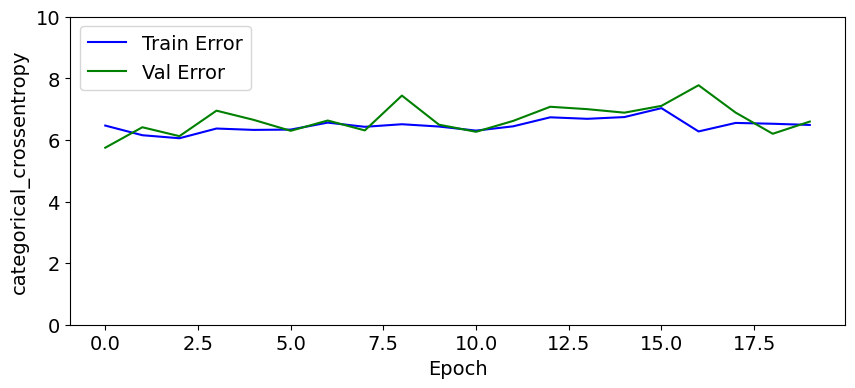

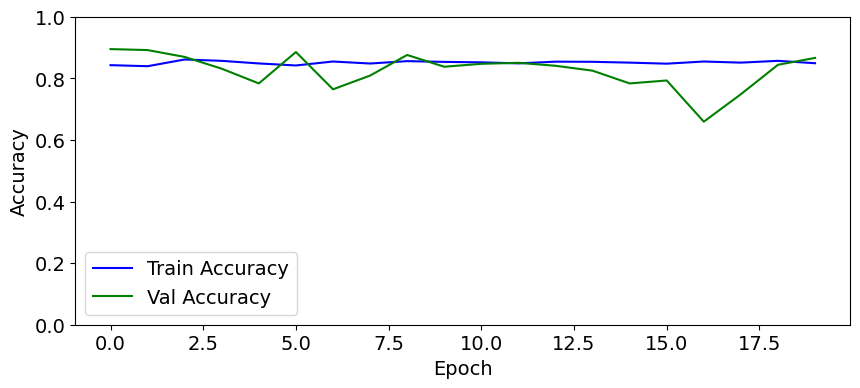

In [325]:
hist_resnet = pd.DataFrame(model_fit_rn.history)
hist_resnet['epoch'] = model_fit_rn.epoch
hist_resnet.head(3)



def plot_history(history):

    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('categorical_crossentropy')
    plt.plot(hist_resnet['epoch'], hist_resnet['loss'],
             label='Train Error',color='b')
    plt.plot(hist_resnet['epoch'], hist_resnet['val_loss'],
         label='Val Error',color='g')
    plt.legend()
    plt.ylim([0,10])
    
    
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist_resnet['epoch'], hist_resnet['accuracy'],
             label='Train Accuracy',color='b')
    plt.plot(hist_resnet['epoch'], hist_resnet['val_accuracy'],
         label='Val Accuracy',color='g')
    plt.legend()
    plt.ylim([0,1])
plot_history(model_fit_rn)

**[Return to the index](#index)**

---
<a id='4'> </a>

# 4.  Summary & Insights

 ```The results indicate that the CNN_1 model architecture performs the best, with a test accuracy of 91.1%. However, the accuracy for the "potato" class is lower than the other classes. Notably, these results were achieved without using any data augmentation techniques.```


 ```It appears that the CNN_1 model architecture with augmented data comes in second place, achieving a test accuracy of 90%. However, the "potato" class still has the lowest accuracy compared to the other classes. Although ImageDataGenerator was used for data augmentation during training, it did not improve the accuracy of the model for this class.```


 ```The ResNet152V2 model, used as a transfer learning model, comes in third place with an accuracy of 79.20%. However, the model struggled to accurately predict certain classes, such as "Indian market", "onion", and "potato". On the other hand, the model performed well in predicting the "tomato" class. Overall, the ResNet152V2 model is considered to be one of the top transfer learning models available, despite its limitations in this particular task.```



 ```The base model, which is built on an artificial neural network (ANN), has the lowest accuracy among all the models, with a test accuracy of 62.96%. The model struggles to predict most of the classes, including "Indian market", "onion", and "potato", except for the "tomato" class. The model takes flattened image data as input, and its performance is notably poorer than the other models in this study.```